In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline


In [114]:
df = pd.read_excel("Patient_Dataset_KMeans.xlsx")
df.head()

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,1,50,Female,23.8,155,120,1,1,1
1,2,79,Female,33.5,140,103,0,1,1
2,3,90,Male,24.6,171,136,1,1,0
3,4,38,Female,37.8,91,125,0,0,0
4,5,40,Female,26.8,112,130,0,0,0


In [115]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data preprocessing
# Removing unnecessary columns for analysis
columns_to_use = ['Age', 'BMI', 'Blood_Pressure', 'Glucose_Level', 'Has_Diabetes', 'Has_Stroke', 'Has_Asthma']
data_for_pca = df[columns_to_use]
data_for_pca

,Age,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma
0,50,23.8,155,120,1,1,1
1,79,33.5,140,103,0,1,1
2,90,24.6,171,136,1,1,0
3,38,37.8,91,125,0,0,0
4,40,26.8,112,130,0,0,0
...,...,...,...,...,...,...,...
195,62,36.2,113,175,0,0,1
196,78,27.7,126,195,0,0,1
197,59,26.7,116,86,0,1,1
198,60,20.6,179,70,0,1,1


In [116]:
# Data Normalisation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [117]:
from sklearn.cluster import KMeans  # Import KMeans clustering algorithm from scikit-learn library
from sklearn.metrics import silhouette_score  # Import silhouette score metric for evaluating cluster quality

In [118]:
# Applying Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(scaled_data)

In [119]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Test between 2 and 9 clusters

# Iterate over the range of possible cluster numbers
for k in K_range:
    # Initialize a KMeans model with the current cluster number
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the reduced data
    kmeans.fit(reduced_data)
    # Append the inertia (sum of squared distances) to the list
    inertia.append(kmeans.inertia_)
    # Append the silhouette score (a measure of cluster cohesion and separation) to the list
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

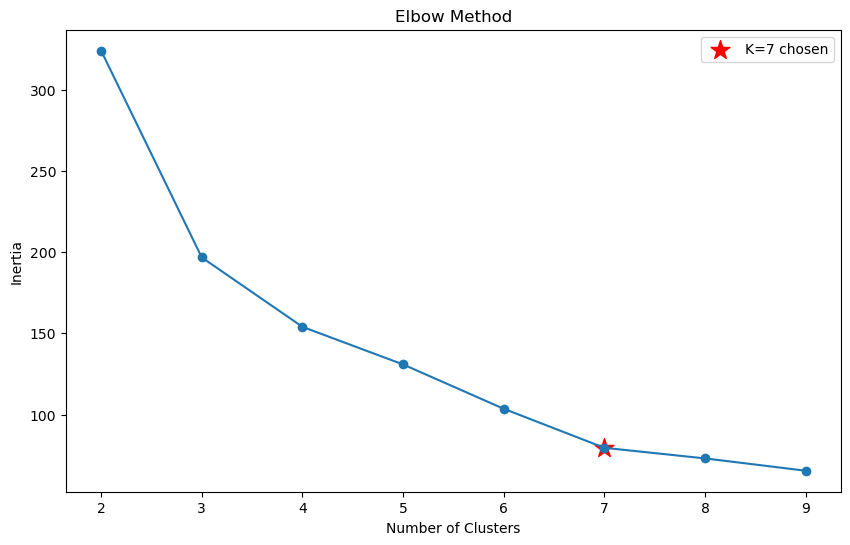

In [120]:
plt.figure(figsize=(10, 6))  # Create a figure with specified size
plt.plot(K_range, inertia, marker='o')  # Plot the inertia values for each K
plt.scatter(7, inertia[5], s=200, c='red', marker='*', label="K=7 chosen")  # Highlight the chosen K value
plt.xlabel('Number of Clusters')  # Set the x-axis label
plt.ylabel('Inertia')  # Set the y-axis label
plt.title('Elbow Method')  # Set the plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

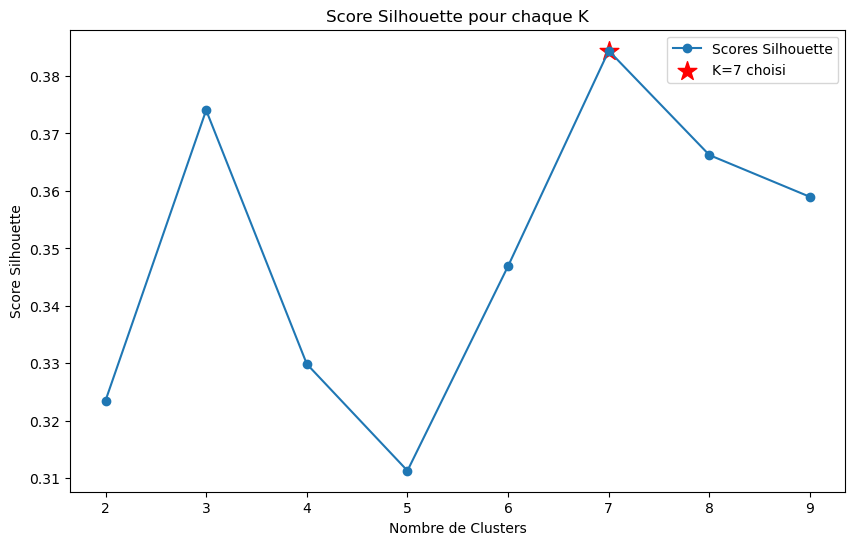

In [122]:
# Visualisation des scores silhouette
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', label='Scores Silhouette')

# Trouver l'indice du score silhouette maximal
best_k_index = silhouette_scores.index(max(silhouette_scores))  # Index du meilleur score
best_k = K_range[best_k_index]  # Correspond au K optimal
best_score = silhouette_scores[best_k_index]  # Score silhouette correspondant

# Ajouter un point rouge pour mettre en évidence le score maximum
plt.scatter(best_k, best_score, s=200, c='red', marker='*', label=f"K={best_k} choisi")

# Ajouter des labels et un titre
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score Silhouette')
plt.title('Score Silhouette pour chaque K')
plt.legend()  # Ajouter une légende pour identifier K optimal
plt.show()


In [123]:
# Application de K-means avec le nombre optimal de clusters (par exemple 3)
optimal_k = 7  # À ajuster selon l'analyse du graphique du coude
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [124]:
# Ajouter les clusters aux données d'origine
df['Cluster'] = clusters
df

,Patient_ID,Age,Gender,BMI,Blood_Pressure,Glucose_Level,Has_Diabetes,Has_Stroke,Has_Asthma,Cluster
0,1,50,Female,23.8,155,120,1,1,1,5
1,2,79,Female,33.5,140,103,0,1,1,5
2,3,90,Male,24.6,171,136,1,1,0,2
3,4,38,Female,37.8,91,125,0,0,0,1
4,5,40,Female,26.8,112,130,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...
195,196,62,Female,36.2,113,175,0,0,1,1
196,197,78,Male,27.7,126,195,0,0,1,3
197,198,59,Female,26.7,116,86,0,1,1,5
198,199,60,Female,20.6,179,70,0,1,1,4


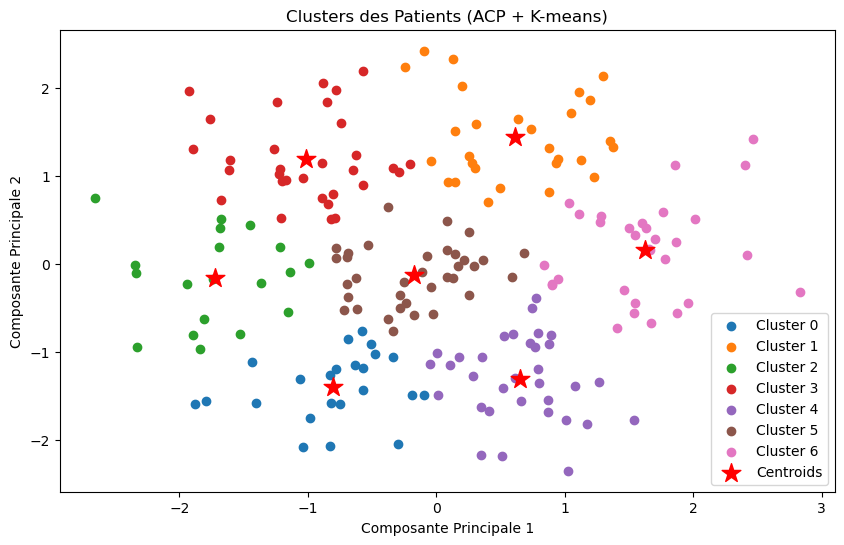

In [125]:
# Visualisation des clusters dans l'espace des composantes principales
plt.figure(figsize=(10, 6))

# Afficher les points pour chaque cluster
for cluster_id in range(optimal_k):
    plt.scatter(
        reduced_data[clusters == cluster_id, 0],  # Points du cluster sur la 1ère composante
        reduced_data[clusters == cluster_id, 1],  # Points du cluster sur la 2ème composante
        label=f'Cluster {cluster_id}'
    )

# Afficher les centroïdes
plt.scatter(
    kmeans.cluster_centers_[:, 0],  # Centroïdes sur la 1ère composante
    kmeans.cluster_centers_[:, 1],  # Centroïdes sur la 2ème composante
    s=200,
    c='red',
    label='Centroids',
    marker='*'
)

# Ajouter des titres et légendes
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters des Patients (ACP + K-means)')
plt.legend()
plt.show()


In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to plot the path taken by centroids during K-means iterations
def plot_k_means_progress(centroid_history, n_clusters, centroid_sets, cluster_color):
    """
    Plot the path taken by centroids during K-means iterations.

    Parameters:
    - centroid_history: 2D array storing the history of centroids for all iterations.
    - n_clusters: Total number of clusters.
    - centroid_sets: Number of centroid sets (iterations + initial set).
    - cluster_color: Dictionary of colors for each cluster.

    Returns:
    - A plot showing the movement of centroids during K-means.
    """
    for i in range(n_clusters):
        c_x = []  # To store X-coordinates of the centroid's path
        c_y = []  # To store Y-coordinates of the centroid's path
        for j in range(centroid_sets):
            index = i + j * n_clusters  # Calculate index for the centroid history
            c_x.append(centroid_history[index, 0])
            c_y.append(centroid_history[index, 1])
        # Plot the centroid's path
        plt.plot(c_x, c_y, c=cluster_color[f'c_{i}'], linestyle='--', label=f'Path Cluster {i}')


c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


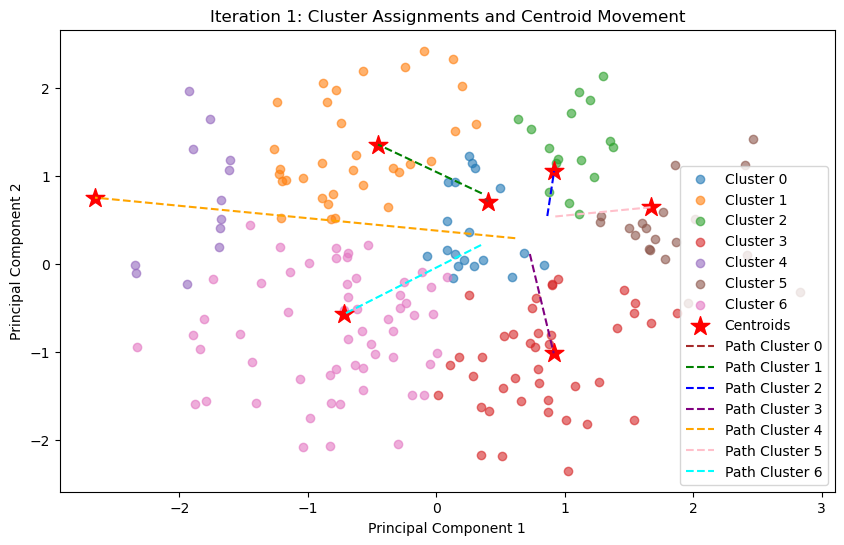

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


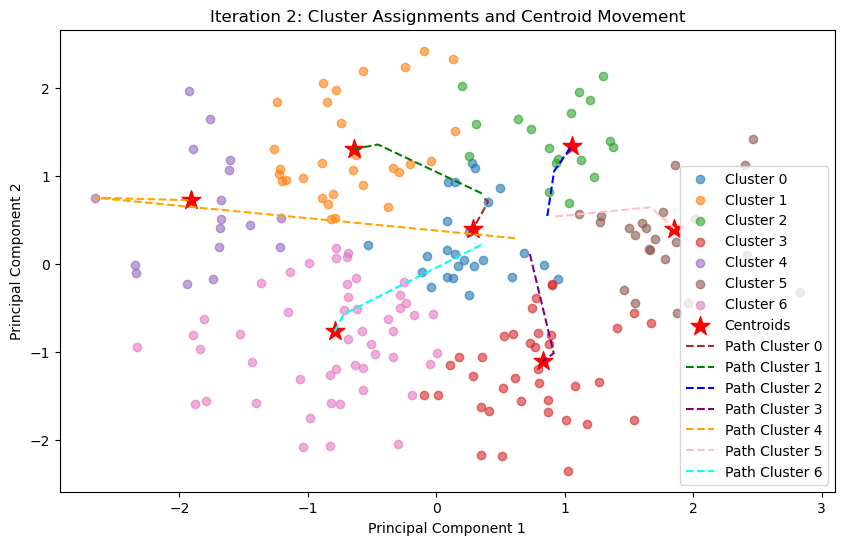

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


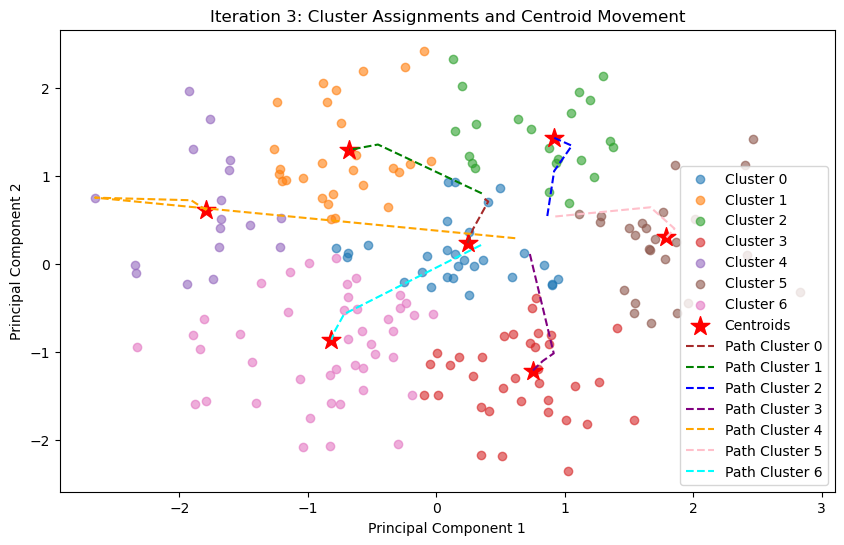

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


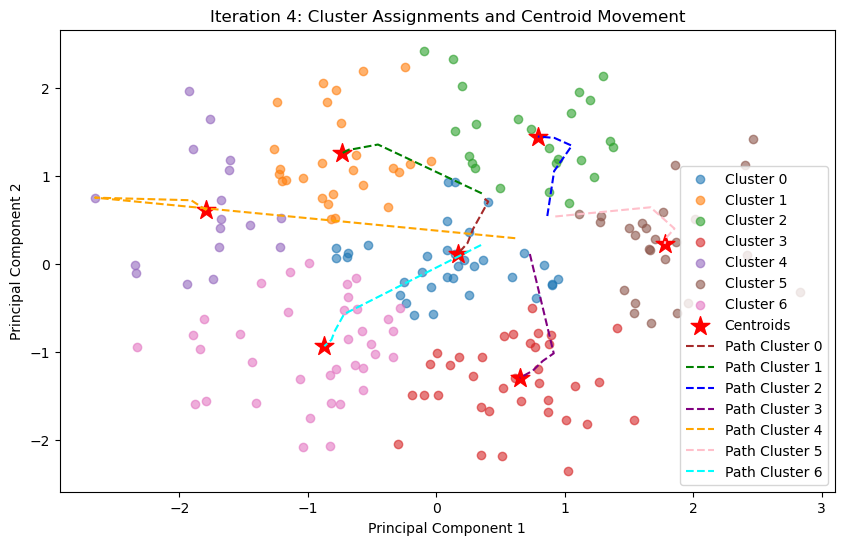

c:\Users\bakho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


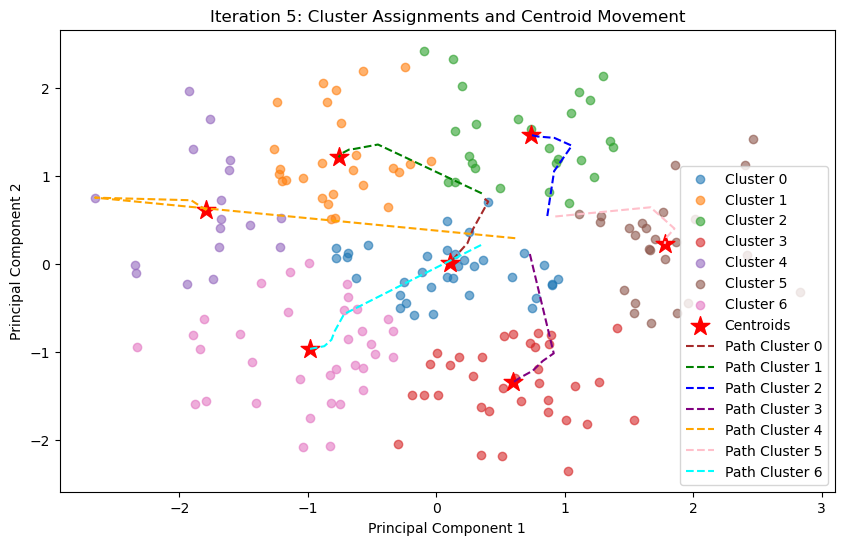

In [127]:

# Initialize cluster colors
cluster_color = {f'c_{i}': color for i, color in enumerate(['brown', 'green', 'blue', 'purple', 'orange', 'pink', 'cyan'])}

# Number of clusters
n_clusters = 7

# Initial centroids (for demonstration purposes; you can use random initialization too)
initial_centroid = np.random.rand(n_clusters, 2)  # Randomly initialize centroids in 2D space

# Store centroid history
centroid_history = initial_centroid.copy()

# Simulate data for clustering (use your reduced_data here)
X = reduced_data  # Replace with your reduced 2D dataset from PCA

# Perform K-means clustering for multiple iterations
for i in range(1, 6):  # 5 iterations of K-means
    kmeans = KMeans(n_clusters=n_clusters, init=centroid_history[-n_clusters:], n_init=1, max_iter=1, random_state=42)
    clusters = kmeans.fit_predict(X)

    # Plot the data points and cluster assignments
    plt.figure(figsize=(10, 6))
    for cluster_id in range(n_clusters):
        plt.scatter(
            X[clusters == cluster_id, 0], X[clusters == cluster_id, 1],
            label=f'Cluster {cluster_id}', alpha=0.6
        )
    
    # Plot the current centroids
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=200, c='red', label='Centroids', marker='*'
    )

    # Update centroid history
    centroid_history = np.vstack([centroid_history, kmeans.cluster_centers_])
    
    # Plot the centroid paths
    plot_k_means_progress(centroid_history, n_clusters, i + 1, cluster_color)

    # Configure plot
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Iteration {i}: Cluster Assignments and Centroid Movement')
    plt.legend()
    plt.show()
